## Lab5: image processing


### Task 1
- There is an example of "coarse graining" to accelerate of entropy of the image. So your task to calcluate the entropy of the image without "coarse graining". Watch your memory and cpu load. 


In [173]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import math
%matplotlib inline

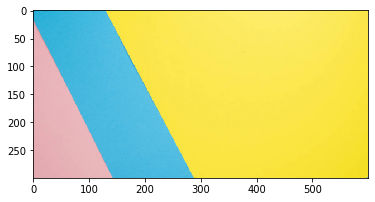

In [174]:
img1 = io.imread("https://st4.depositphotos.com/11216536/i/600/depositphotos_287030832-stock-photo-flat-lay-pastel-paper-background.jpg")
plt.imshow(img1)

In [175]:
def entropy(img1):
    p = np.array([(img1==v).sum() for v in range(256)])# Compute normalized histogram
    p = p/p.sum()
    e = -(p[p>0]*np.log2(p[p>0])).sum() # Compute e = -sum(p(g)*log2(p(g)))
    return e

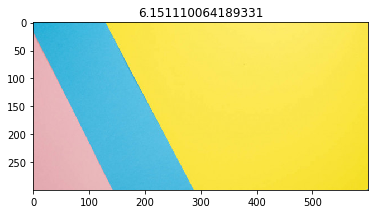

In [176]:
plt.figure()
plt.imshow(img1)
plt.title(entropy(img1))
plt.show()

## Task 2
* There is an example of joint entropy for image. Calculate, plz, conditional entropy through probabilities

In [177]:
w = img.shape[0]
h = img.shape[1]

def color2ind(pix):
    rind = math.floor(pix[0]/32)
    gind = math.floor(pix[1]/32)
    bind = math.floor(pix[2]/32)
    return (rind,gind,bind)

res = np.zeros((8,8,8,8,8,8))
resx = np.zeros((8,8,8))
for i in range(1,w-1):
    for j in range(1,h-1):
        rind,gind,bind = color2ind(img1[i,j])
        resx[rind,gind,bind] += 1
        for di,dj in ((-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)):
            rind1,gind1,bind1 = color2ind(img1[i+di,j+dj])
            res[rind,gind,bind,rind1,gind1,bind1] += 1
res = res/res.sum()
resx = resx/resx.sum()
indexs = res.nonzero()
ll = len(indexs[0])
ce= 0
for ii in range(ll):
    p = res[indexs[0][ii]][indexs[1][ii]][indexs[2][ii]][indexs[3][ii]][indexs[4][ii]][indexs[5][ii]]
    ce+=(math.log2(resx[indexs[0][ii]][indexs[1][ii]][indexs[2][ii]])*p)-(p*math.log2(p))
print(ce)
# 0.7525406640642551

0.7525406640642551


## Task 3
* Calculate coniditional entropies for two images, one of them is half green, half black; Another one is half blue and half red. 

In [178]:
img2 = io.imread("blue-red.png")
img3 = io.imread("green-black.png")

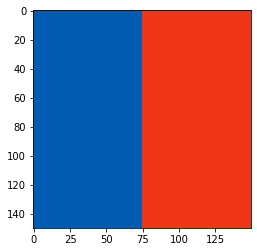

In [184]:
plt.imshow(img2)

In [194]:
def color2ind(pix):
    rind = math.floor(pix[0]/32)
    gind = math.floor(pix[1]/32)
    bind = math.floor(pix[2]/32)
    return (rind,gind,bind)
def ce(img):
    w = img.shape[0]
    h = img.shape[1]
    res = np.zeros((8,8,8,8,8,8))
    resx = np.zeros((8,8,8))
    for i in range(1,w-1):
        for j in range(1,h-1):
            rind,gind,bind = color2ind(img[i,j])
            resx[rind,gind,bind] += 1
            for di,dj in ((-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)):
                rind1,gind1,bind1 = color2ind(img[i+di,j+dj])
                res[rind,gind,bind,rind1,gind1,bind1] += 1
    res = res/res.sum()
    resx = resx/resx.sum()
    indexs = res.nonzero()
    ll = len(indexs[0])
    ce= 0
    for ii in range(ll):
        p = res[indexs[0][ii]][indexs[1][ii]][indexs[2][ii]][indexs[3][ii]][indexs[4][ii]][indexs[5][ii]]
        ce+=(math.log2(resx[indexs[0][ii]][indexs[1][ii]][indexs[2][ii]])*p)-(p*math.log2(p))
    return "Conditional Entropy:",ce

Text(0.5, 1.0, "('Conditional Entropy:', 0.0674017002767394)")

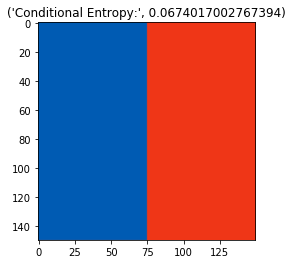

In [199]:
plt.imshow(img2)
plt.title(ce(img2))

Text(0.5, 1.0, "('Conditional Entropy:', 0.06900867383932405)")

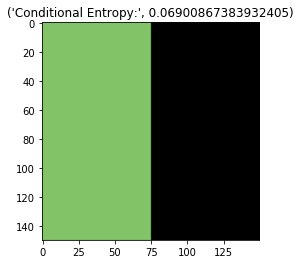

In [197]:
plt.imshow(img3)
plt.title(ce(img3))